<a href="https://colab.research.google.com/github/BelikMary/Data_Science_platform/blob/main/04_1_HW_BelikMK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Задание к лекции 04-1: Линейная регрессия 1

Name: Белик Мария, АДЭУ-211

Email: BelikMK@mgpu.ru




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [ ]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

In [ ]:
#Для удобства загоним все данные в единый датафрейм

all_consump = food_consump_dose0+food_consump_dose2p5+food_consump_dose5
all_doses=[0,0,0,0,0,0,0,0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,5,5,5,5,5,5,5,5]

data=[]
data.append(all_consump)
data.append(all_doses)

df=pd.DataFrame(data).transpose()
df.columns=['food_consump','drug_dose']
df

,food_consump,drug_dose
0,112.6,0.0
1,102.1,0.0
2,90.2,0.0
3,81.5,0.0
4,105.6,0.0
5,93.0,0.0
6,106.6,0.0
7,108.3,0.0
8,73.3,2.5
9,84.8,2.5


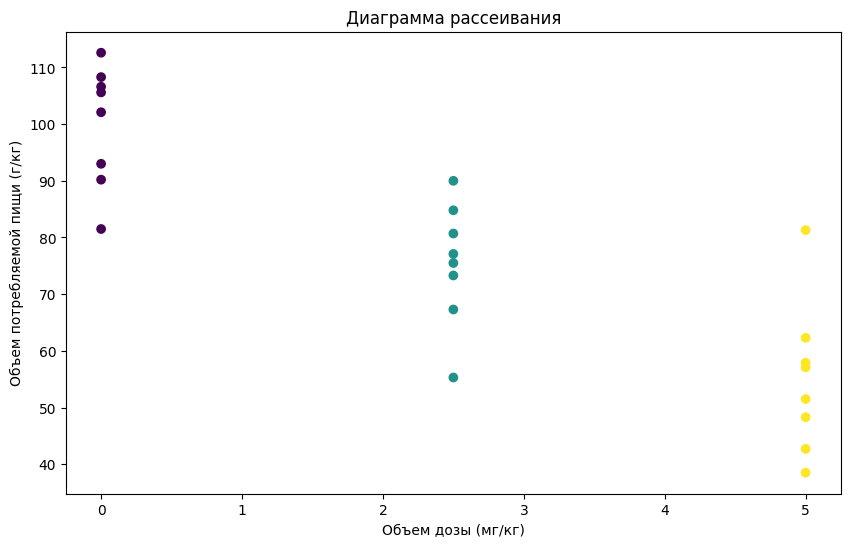

In [ ]:
#создаем диаграмму рассеивания

plt.scatter(x=df['drug_dose'], y=df['food_consump'], c=df['drug_dose'])
plt.xlabel('Объем дозы (мг/кг)')
plt.ylabel('Объем потребляемой пищи (г/кг)')
plt.title('Диаграмма рассеивания')
plt.show()

In [ ]:
cons_dose_ols=sm.ols(formula="food_consump ~ drug_dose", data=df).fit()
cons_dose_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           food_consump   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           7.27e-08
Time:                        09:26:49   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.000      91.700     106.963
drug_dose     -9.0075      1.140     -7.900      0.000     -11.372      -6.643
==============================================================================
Omnibus:                        0.409   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.052
Skew:                           0.114   Prob(JB):                        0.974
Kurtosis:                       3.012   Cond. No.                         5.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ваш ответ:**

* Получается уравнение: $$
\text{Потребление пищи} = 99,3 - 9 * {Доза}.
$$
* Коэффициент детерминации равен 73,9%, р-значение показывает, что модель статистически значима.
* Добавим линию тренда к диаграмме рассеивания:

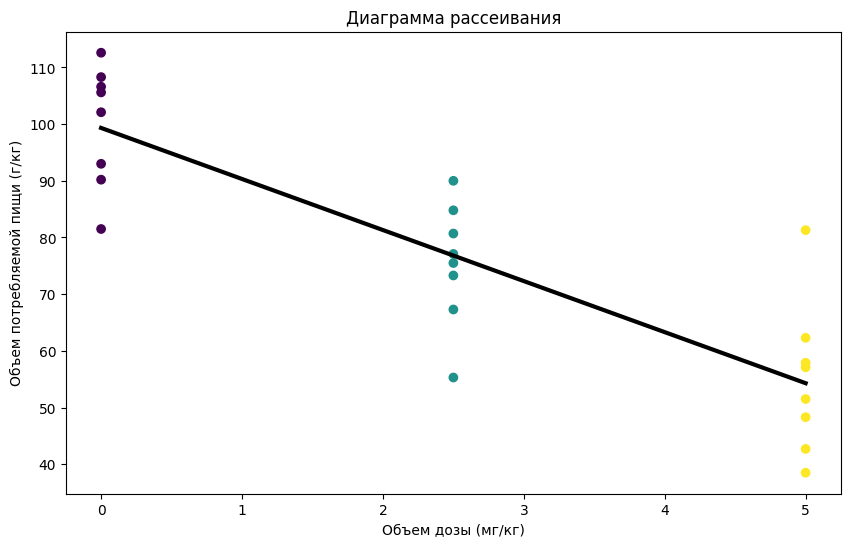

In [ ]:
#добавление линии тренда (так нужно по заданию)

plt.scatter(x=df['drug_dose'], y=df['food_consump'], c=df['drug_dose'])
plt.plot(df['drug_dose'], cons_dose_ols.predict(), color='black',linewidth=3)

plt.xlabel('Объем дозы (мг/кг)')
plt.ylabel('Объем потребляемой пищи (г/кг)')
plt.title('Диаграмма рассеивания')
plt.show()

Исходя из графика выше, видно, чем больше объем дозы, тем меньше объем потребляемой пищи, что (в принципе) логично.

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



In [ ]:
#найдем остатки для каждого значения

df['predict'] = cons_dose_ols.predict()
df['inconsistency']=df['food_consump']-df['predict']
df

,food_consump,drug_dose,predict,inconsistency
0,112.6,0.0,99.33125,13.26875
1,102.1,0.0,99.33125,2.76875
2,90.2,0.0,99.33125,-9.13125
3,81.5,0.0,99.33125,-17.83125
4,105.6,0.0,99.33125,6.26875
5,93.0,0.0,99.33125,-6.33125
6,106.6,0.0,99.33125,7.26875
7,108.3,0.0,99.33125,8.96875
8,73.3,2.5,76.81250,-3.51250
9,84.8,2.5,76.81250,7.98750


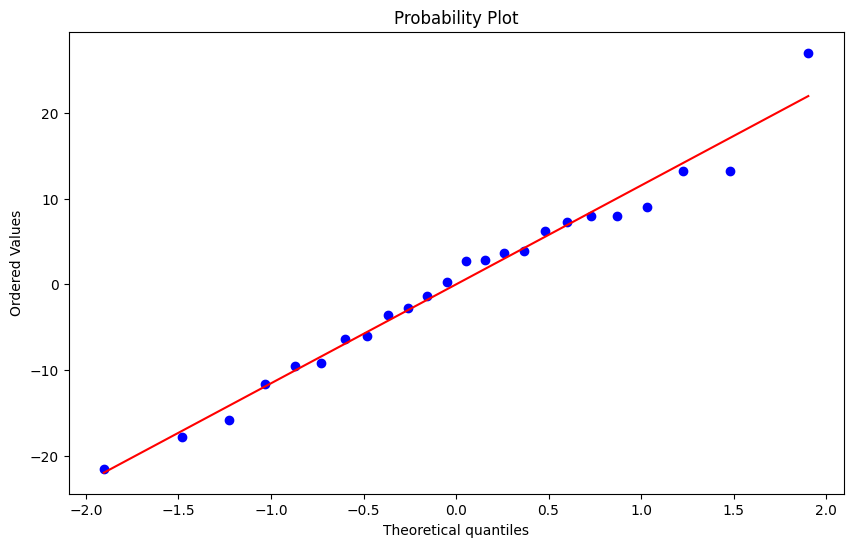

In [ ]:
#построим нормальный вероятностный график остатков

from scipy import stats

res = stats.probplot(df['inconsistency'], plot=plt)
plt.show()

**Ваш ответ:**


На нормальном вероятностном графике остатков остатки в принципе несильно отклоняются от базовой линии, следовательно предположение о нормальности отсатков выполняется. Я судила, исходя из примеров ниже, где мой полученный график больше похож на первый рисунок.

ПРИМЕРЫ С [САЙТА](https://www.codecamp.ru/blog/linear-regression-assumptions/)

На первом графике показан пример остатков, которые примерно соответствуют нормальному распределению:

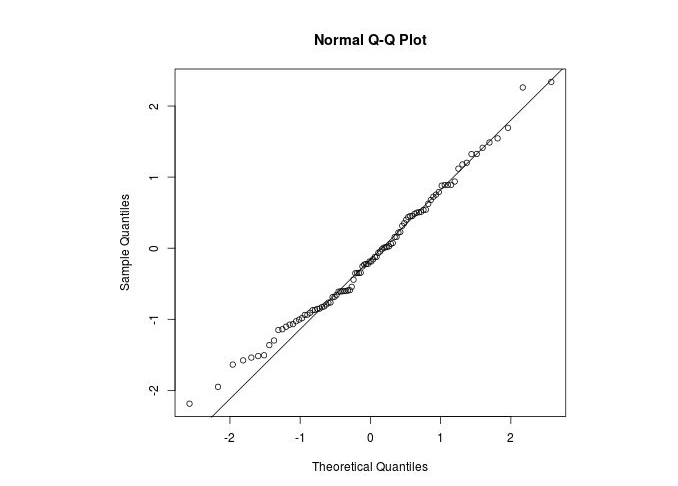

На втором рисунке показан пример, когда остатки не распределены нормально:

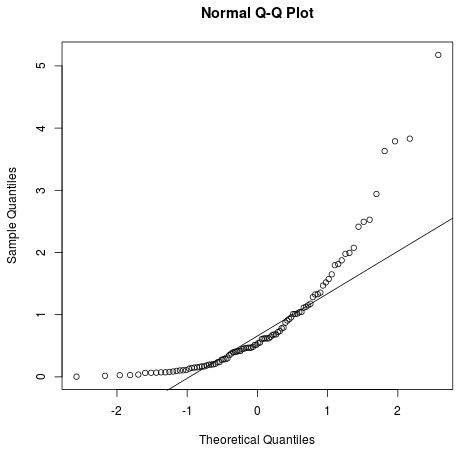